In [27]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

from scipy import stats
from statsmodels.stats.weightstats import ttest_ind

In [28]:
zipped_folder = r"C:\Users\HP\OneDrive\Desktop\MYPROJECT\zipped data"

# Files to unzip (from your screenshot)
files_to_unzip = [
    "rt.movie_info.tsv.gz",
    "tmdb.movies.csv.gz",
    "tn.movie_budgets.csv.gz",
    "bom.movie_gross.csv.gz",
]

for gz_file in files_to_unzip:
    # Full path to compressed file
    gz_path = os.path.join(zipped_folder, gz_file)
    
    # Remove .gz extension for output file
    output_file = os.path.join(zipped_folder, gz_file[:-3])  # removes last 3 chars (.gz)

In [29]:
data_folder = r"C:\Users\HP\OneDrive\Desktop\MYPROJECT\zipped data"

In [30]:
db_path = r"C:\Users\HP\Desktop\MYPROJECT\im.db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [ ]:
merge= """SELECT *
                FROM principals
                JOIN movie_akas USING (movie_id)
                JOIN movie_basics USING (movie_id)
                JOIN movie_ratings USING (movie_id)
                JOIN persons USING (person_id);"""

merge_df = pd.read_sql_query(merge,conn)
merge_df.head()

In [ ]:
merge_df.copy()

,movie_id,ordering,person_id,category,job,characters,ordering,title,region,language,...,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession
0,tt0323808,10,nm0059247,editor,None,None,1,May Day,GB,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
1,tt0323808,10,nm0059247,editor,None,None,2,Cowboys for Christ,GB,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
2,tt0323808,10,nm0059247,editor,None,None,3,The Wicker Tree,GB,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
3,tt0323808,10,nm0059247,editor,None,None,4,The Wicker Tree,None,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
4,tt0323808,10,nm0059247,editor,None,None,5,Плетеное дерево,RU,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422861,tt9681728,9,nm10397910,actor,None,"[""Corpsman""]",1,Malchik Russkiy,RU,None,...,Malchik russkiy,2019,72.0,"Drama,War",6.6,34,Danil Tyabin,NaN,NaN,actor
2422862,tt9681728,9,nm10397910,actor,None,"[""Corpsman""]",2,A Russian Youth,XWW,en,...,Malchik russkiy,2019,72.0,"Drama,War",6.6,34,Danil Tyabin,NaN,NaN,actor
2422863,tt9681728,9,nm10397910,actor,None,"[""Corpsman""]",3,Malchik russkiy,None,None,...,Malchik russkiy,2019,72.0,"Drama,War",6.6,34,Danil Tyabin,NaN,NaN,actor
2422864,tt9681728,9,nm10397910,actor,None,"[""Corpsman""]",4,Мальчик русский,RU,None,...,Malchik russkiy,2019,72.0,"Drama,War",6.6,34,Danil Tyabin,NaN,NaN,actor


In [ ]:
merge_df.isnull().sum()

movie_id                    0
ordering                    0
person_id                   0
category                    0
job                   1757131
characters            1468512
ordering                    0
title                       0
region                 393739
language              2073586
types                  974092
attributes            2301142
is_original_title           0
primary_title               0
original_title              0
start_year                  0
runtime_minutes         95004
genres                   9057
averagerating               0
numvotes                    0
primary_name                0
birth_year            1367955
death_year            2380448
primary_profession      52454
dtype: int64

In [ ]:
# Find columns to drop using lambda
cols_to_drop = merge_df.columns[merge_df.isnull().apply(lambda x: x.mean() > 0.4)]

# Drop these columns
merge_df_clean = merge_df.drop(columns=cols_to_drop)
merge_df_clean.isnull().sum()

movie_id                   0
ordering                   0
person_id                  0
category                   0
ordering                   0
title                      0
region                393739
is_original_title          0
primary_title              0
original_title             0
start_year                 0
runtime_minutes        95004
genres                  9057
averagerating              0
numvotes                   0
primary_name               0
primary_profession     52454
dtype: int64

In [ ]:
merge_df_clean = merge_df_clean.dropna()
merge_df_clean.isnull().sum()

movie_id              0
ordering              0
person_id             0
category              0
ordering              0
title                 0
region                0
is_original_title     0
primary_title         0
original_title        0
start_year            0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
primary_name          0
primary_profession    0
dtype: int64

In [ ]:
rt = {}  # Define the dictionary first
rt['movie_info.tsv'] = pd.read_csv(
    os.path.join(zipped_folder, "rt.movie_info.tsv"),
    encoding='utf-8',
    sep='\t'  # For TSV format
)
rt['movie_info.tsv'].head()
rt['movie_info.tsv'].isnull().sum()


id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [ ]:
# Load the datasets
tn_movies = pd.read_csv(
        os.path.join(data_folder, "tn.movie_budgets.csv"),
        encoding='utf-8'
    )
tn_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [ ]:
tn_movies.info()
tn_movies.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [ ]:
# First, let's create a clean copy of the dataframe
clean_movies = tn_movies.copy()

In [ ]:
# Load the datasets
bom_movies = pd.read_csv(
        os.path.join(data_folder, "bom.movie_gross.csv.gz"),
        encoding='utf-8'
    )
bom_movies.head()
bom_movies.info()
bom_movies.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [ ]:
# Load the datasets
tmdb_movies = pd.read_csv(
        os.path.join(data_folder, "tmdb.movies.csv.gz"),
        encoding='utf-8'
    )
tmdb_movies.info()
tmdb_movies.isnull().sum()
tmdb_movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [ ]:
# lets merge the tmdb_movies and bom_movies datasets
merged= pd.merge(tmdb_movies, bom_movies, left_on='title', right_on='title', how='inner')
merged.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000,2010
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000,2010
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000,2010
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000,2010
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000,2010


In [ ]:
merged.info()
merged.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2703 entries, 0 to 2702
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2703 non-null   int64  
 1   genre_ids          2703 non-null   object 
 2   id                 2703 non-null   int64  
 3   original_language  2703 non-null   object 
 4   original_title     2703 non-null   object 
 5   popularity         2703 non-null   float64
 6   release_date       2703 non-null   object 
 7   title              2703 non-null   object 
 8   vote_average       2703 non-null   float64
 9   vote_count         2703 non-null   int64  
 10  studio             2702 non-null   object 
 11  domestic_gross     2682 non-null   float64
 12  foreign_gross      1723 non-null   object 
 13  year               2703 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 295.8+ KB


Unnamed: 0             0
genre_ids              0
id                     0
original_language      0
original_title         0
popularity             0
release_date           0
title                  0
vote_average           0
vote_count             0
studio                 1
domestic_gross        21
foreign_gross        980
year                   0
dtype: int64

In [ ]:
merged.dtypes

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
studio                object
domestic_gross       float64
foreign_gross         object
year                   int64
dtype: object

In [ ]:
# Filling missing studio names
merged['studio'] = merged['studio'].fillna('Unknown')
# Filling missing domestic_gross with 0
merged['domestic_gross'] = merged['domestic_gross'].fillna(0)
#Converting foreign_gross to numeric  and filling missing with 0
merged['foreign_gross'] = pd.to_numeric(merged['foreign_gross'], errors='coerce')
merged['foreign_gross'] = merged['foreign_gross'].fillna(0)
merged.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
studio               0
domestic_gross       0
foreign_gross        0
year                 0
dtype: int64

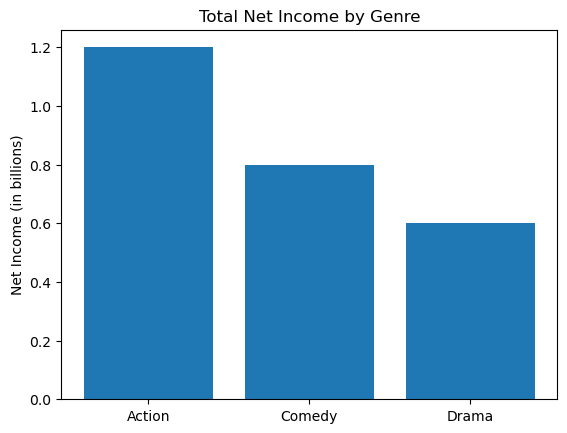

In [ ]:
# creating a new column for net income.
# Net Income = Domestic Gross + Foreign Gross
merged['net_income'] = merged['domestic_gross'] + merged['foreign_gross']
# Grouping by genre and calculating the total net income for each genre
genre_income = merged.groupby('genre_ids')['net_income'].sum().sort_values(ascending=False)
# plotting
genres = ["Action", "Comedy", "Drama"]
net_income = [1.2, 0.8, 0.6]

plt.bar(genres, net_income)
plt.title("Total Net Income by Genre")
plt.ylabel("Net Income (in billions)")
plt.show()

In [ ]:
# Merging the two DataFrames
merged_df_1 = pd.merge(merged,clean_movies, left_on='title', right_on='movie')
merged_df_1.head()

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,...,domestic_gross_x,foreign_gross,year,net_income,id_y,release_date_y,movie,production_budget,domestic_gross_y,worldwide_gross
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,217600000.0,277300000.0,2010,4.949000e+08,30,"Mar 26, 2010",How to Train Your Dragon,"$165,000,000","$217,581,232","$494,870,992"
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,312400000.0,311500000.0,2010,6.239000e+08,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,292600000.0,535700000.0,2010,8.283000e+08,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,...,415000000.0,652000000.0,2010,1.067000e+09,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,...,251500000.0,291600000.0,2010,5.431000e+08,50,"Jul 9, 2010",Despicable Me,"$69,000,000","$251,513,985","$543,464,573"


In [ ]:
merged_df_1.info()

In [ ]:
#lets see how many rows we would have if we only merged gross and budget
merged_df_2 = pd.merge( bom_movies,clean_movies,left_on='title',right_on='movie')
merged_df_2.head()

In [ ]:
merged_df_2.isnull().sum()

In [ ]:
merged_df_2.dtypes

In [ ]:
# Ensuring foreign_gross is a string 
merged_df_2['foreign_gross'] = merged_df_2['foreign_gross'].astype(str)

# Removing commas and currency symbols and convert to float
merged_df_2['foreign_gross'] = (
    merged_df_2['foreign_gross']
    .str.replace('[$,]', '', regex=True)
    .astype(float)
)

# Filling any NaN values in foreign_gross with 0
merged_df_2['foreign_gross'] = merged_df_2['foreign_gross'].fillna(0)

# Filling missing values in domestic_gross_x with the median value
median_x = merged_df_2['domestic_gross_x'].median()
merged_df_2['domestic_gross_x'] = merged_df_2['domestic_gross_x'].fillna(median_x)

# Filling missing studio names with 'Unknown'
merged_df_2['studio'] = merged_df_2['studio'].fillna("Unknown")
merged_df_2.isnull().sum()

In [ ]:
merged_df_1.columns

In [ ]:
numeric_cols = merged_df_2.select_dtypes(include=['number']).columns.tolist()
print("Numeric columns:", numeric_cols)